In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with = engine)

In [24]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
m = base.classes.measurement
s = base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
#this gives you all the dates in the column
#session.query(m.date).all()
# .all gives you a list so all things will be in list form

#for specifying dates
#session.query(m.date).first()

# .first gives you the first
# .max value worked here because its a string value and the numbers were the largest at the most recent date in the data set

# so to call the date you would use: session.query(func.max(m.date)).first()

In [32]:
# Find the most recent date in the data set.
last_date = session.query(func.max(m.date)).first()
print(last_date)
last_date = last_date[0]

('2017-08-23',)


In [33]:
#convert the string value to an actual date time value
dt.datetime.strptime(last_date,'%Y-%m-%d').date()

datetime.date(2017, 8, 23)

In [34]:
prev_year = dt.datetime.strptime(last_date,'%Y-%m-%d').date() - dt.timedelta(365)

In [35]:
#TEST CELL FOR app.py

last_date = session.query(func.max(m.date)).first()
last_date = last_date[0]
prev_year = dt.datetime.strptime(last_date,'%Y-%m-%d').date() - dt.timedelta(365)

results = session.query(m.date, m.prcp).filter(m.date >= prev_year).all()

#need to covert results to a dictionary where the precipitation is the variable
results_dict  = {}
for tuple in results:
    results_dict[tuple[0]] = tuple[1]
results_dict

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

In [36]:
session.query(m.date, m.prcp).filter(m.date >= prev_year).all()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
prev_year = dt.datetime.strptime(last_date,'%Y-%m-%d').date() - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
result_prcp = session.query(m.date, m.prcp).filter(m.date >= prev_year).all()

In [38]:
prcp_df = pd.DataFrame(result_prcp, columns = ["Date", "Precipitaiton in Inches"])
prcp_df

,Date,Precipitaiton in Inches
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


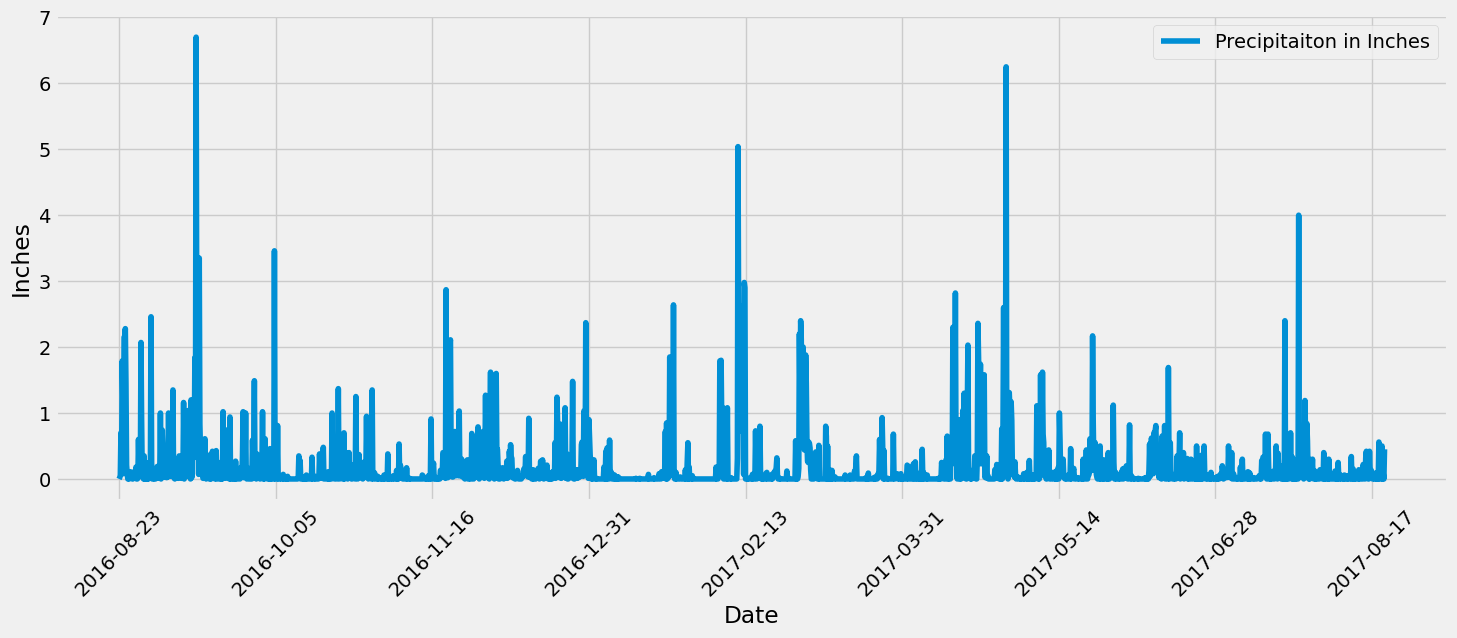

In [39]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(result_prcp, columns = ["Date", "Precipitaiton in Inches"])

# Sort the dataframe by date
prcp_df = prcp_df.dropna().sort_values("Date").set_index("Date")
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize = [16, 6], rot = 45, ylabel = "Inches");

In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitaiton in Inches
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
prev_year = dt.datetime.strptime(last_date,'%Y-%m-%d').date() - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
result_prcp = session.query(m.date, m.prcp).filter(m.date >= prev_year).all()

prcp_df = pd.DataFrame(result_prcp, columns = ["Date", "Precipitaiton in Inches"])
prcp_df

In [64]:
# Design a query to calculate the total number of stations in the dataset

#get all station names
#session.query(s.station).all()

session.query(s.station).distinct().count()

9

In [65]:
result_stations = session.query(m.station, m.tobs).all()
result_stations

[('USC00519397', 65.0),
 ('USC00519397', 63.0),
 ('USC00519397', 74.0),
 ('USC00519397', 76.0),
 ('USC00519397', 73.0),
 ('USC00519397', 70.0),
 ('USC00519397', 64.0),
 ('USC00519397', 68.0),
 ('USC00519397', 73.0),
 ('USC00519397', 64.0),
 ('USC00519397', 61.0),
 ('USC00519397', 66.0),
 ('USC00519397', 65.0),
 ('USC00519397', 68.0),
 ('USC00519397', 64.0),
 ('USC00519397', 72.0),
 ('USC00519397', 66.0),
 ('USC00519397', 66.0),
 ('USC00519397', 69.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 71.0),
 ('USC00519397', 67.0),
 ('USC00519397', 76.0),
 ('USC00519397', 68.0),
 ('USC00519397', 72.0),
 ('USC00519397', 70.0),
 ('USC00519397', 67.0),
 ('USC00519397', 66.0),
 ('USC00519397', 67.0),
 ('USC00519397', 69.0),
 ('USC00519397', 67.0),
 ('USC00519397', 67.0),
 ('USC00519397', 64.0),
 ('USC00519397', 69.0),
 ('USC00519397', 73.0),
 ('USC00519397', 73.0),
 ('USC00519397', 69.0),
 ('USC00519397', 69.0),
 ('USC00519397', 69.0),
 ('USC00519397', 71.0),
 ('USC00519397',

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

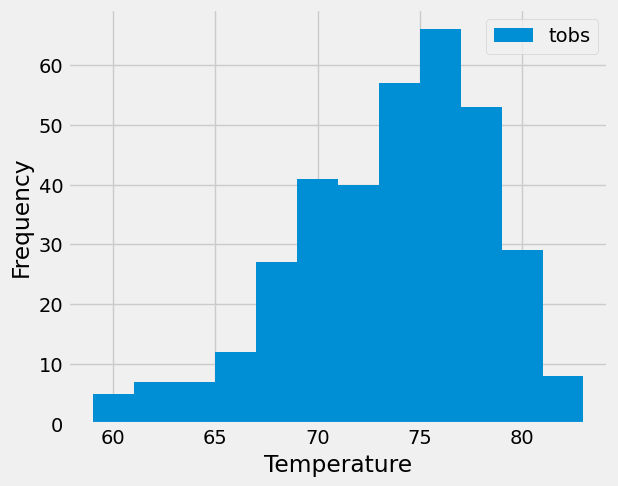

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()